<a href="https://colab.research.google.com/github/Manass20/Airbnb-Booking-Analisys/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Manas_Ranjan_Behera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Collecting and loading data**

For this project, we are using Google colab a web IDE with a python programming language to write our script. IDE or Integrated Development Environment is a software application used for software development.
To get the data, we are using Airbnb data that publicly shared on the internet under the Creative Commons License. Before we are able to load the data into our IDE, first we need to import various external libraries/modules that needed for visualization and analysis.

**a. Load python libraries**

*   Pandas and Numpy library used for data analysis

*   Matplotlib and Seaborn library used for data visualization

In [1]:
#Importing the necessary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the airbnb data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/PROJECTS/EDA/Airbnb Bookings Analysis/Airbnb NYC 2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Location Visualization On Map**

Plotting the location according to their lattitude and longitude. Here we can see the map of the hotels of NYC very clearly.



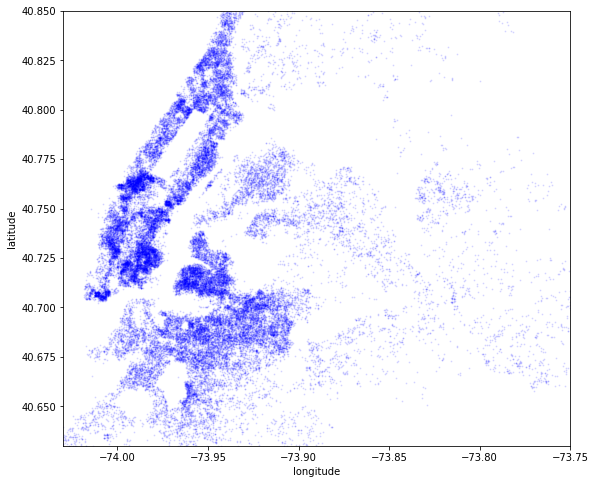

In [4]:
# plotting the graph of latitude and longitude
plt.figure(figsize=(20,8))
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.subplot(121)
plt.scatter(df['longitude'].values, df['latitude'].values,
              color='blue', s=1, alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [6]:
#Checking the shape
df.shape

(48895, 16)

In [7]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Describtion of the data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Experimenting On Data set**

In [6]:
#Checking For Duplicates
df[df.duplicated()== True]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


 - **No Duplicated rows are there**

In [17]:
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64>

**From the following expriments, listing having 0 reviewes in number_of_reviews data in same row last Review and Reviews per month doesn't have any values it was showing NAN, we can conclude that may be newly listed or does'nt have any occupancy till now.**

**In following second cell we can see after removing data of "0" reviews we doesnt see any non Null values in last Review and Reviews per month data.**

After seperating data i found some interesting thing why these 10052 listing have 0 reviews, 

*   25% of listing kept their avaliablity was 0 day. that mean they just listed but not interested in renting there property. 50% of listing kept their avaliablity was 6 daythrought the year.
*   25% of listing kept their price above 200$ Due to high cost these listing may have 0 occupency




In [22]:
#Checking number unique host_id
unique = df['host_id'].nunique()
total = df['host_id'].value_counts().sum()
print(f"from total {total} ids, {unique} values are unique")

from total 48895 ids, 37457 values are unique


In [23]:
#Checking number unique host_name
unique = df['host_name'].nunique()
total = df['host_name'].value_counts().sum()
print(f"from total {total} ids, {unique} values are unique")

from total 48874 ids, 11452 values are unique


In [29]:
#Checking number host_name and host_id = John
jondf=df[df['host_name']=='John']
len(jondf),jondf['host_id'].nunique()

(294, 188)

In [30]:
#Calculating host listings count
a=jondf[jondf['host_id']==2787]
jondf[jondf['host_id']==2787]
a[['id','name','host_id','host_name','calculated_host_listings_count']]

,id,name,host_id,host_name,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,6
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,6
13583,10160215,Torre del Lago Room.,2787,John,6
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,6
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,6
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,6


**From below outcomes we can conclude that neighbourhood_group created with colabrating group of areas where neighbourhood_group consisted only 5 main area of total data.**

**where as neighbourhood are may be sub areas in neighbourhood_groups. total no of places are listed are 221, from this we mostly have to deal with neighbourhood_group data for best outcomes.**

In [32]:
#Checking number and name of unique neighbourhood_group
number = df["neighbourhood_group"].nunique()
name = df["neighbourhood_group"].unique()
print(name)
print(number)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5


In [33]:
#Checking number and name  of unique neighbourhood
number = df["neighbourhood"].nunique()
name = df["neighbourhood"].unique()
print(number)
print(name)

221
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Height

**From the following data we seen a listing that have maximum reviews among all given data. interestingly that was located in Queens but not it either Brooklyn and Manhattan.**


In [34]:
#Maximum reviews
max_reviews=df[df['number_of_reviews']==df['number_of_reviews'].max()]
max_reviews.number_of_reviews.values


array([629])

**From the following data we seen a listing that have maximum reviews per month among all given data.**

In [35]:
#Maximum review of month
max_reviews_permonth=df[df['reviews_per_month']==df['reviews_per_month'].max()]
max_reviews_permonth.reviews_per_month.values

array([58.5])

In [36]:
#Maximum reviews per month
max_reviews_permonth['host_id'].values

array([244361589])

In [37]:
#Testing of host_id 244361589
testing=df[df['host_id']==244361589]
testing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


**From following experiment i just tried to use location data plot on x and y axies resulted a below output. As data was from NYC with 5 particular areas.**

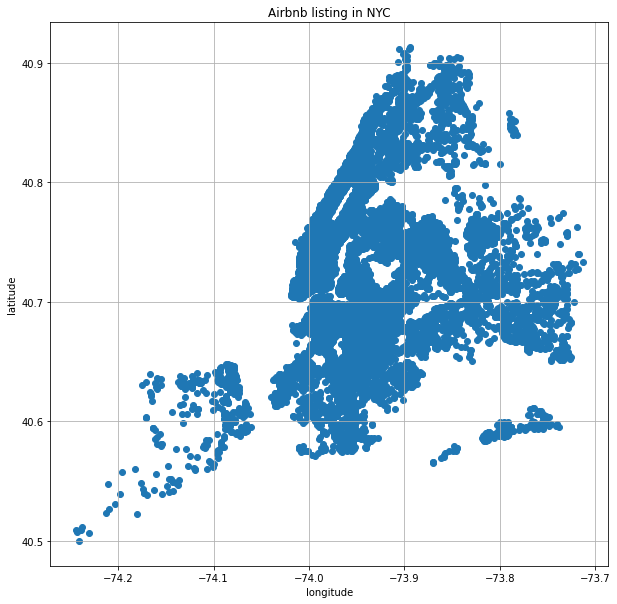

In [38]:
#Plot on longitude vs latitude of Airbnb listing in NYC
plt.rcParams['figure.figsize'] = (10,10)
plt.grid()
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.title('Airbnb listing in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

#  **Cleaning dataset**

The next step is cleaning up the data, oftentimes the data we load have various faults, such as missing value, incomplete data, etc. By doing cleaning up, the data quality will have better quality to be used for further analysis.

**a. Checking column with missing values**

**b. Removing redundant variables**

**c. Replacing all the missing values**

In [39]:
#Creating a copy keeping original data safe
cdf=df.copy()

From Date i seen there is no use from last Review column, and as it had 10052 non null values. i am droping this column.


In [40]:
#Drop last_review
cdf.drop(['last_review'], axis=1,inplace=True)

**From following data information in the column of 'name' and 'host_name' very amount data is missing for reviews_per_month column i justified in above only.**

we going fill the missing name and host_name with "NO NAME"

In [41]:
#Checking last review column was removed.
cdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [42]:
#Managing null values
cdf['name'].fillna('No Name',inplace=True)
cdf['host_name'].fillna('NO_NAME',inplace=True)
cdf.dropna(inplace=True)

In [43]:
#Checking null values
cdf.isnull().sum() 

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [44]:
#Checking shape
cdf.shape

(38843, 15)

# **Exploring and visualizing data**

### Neighbourhood Group

In [45]:
#Count of neighbourhood group id 
Host_by_location=cdf.groupby(['neighbourhood_group'])['id'].count()
Host_by_location

neighbourhood_group
Bronx              876
Brooklyn         16447
Manhattan        16632
Queens            4574
Staten Island      314
Name: id, dtype: int64

Most of the listing have been take placed at Brooklyn and Manhattan, in queens listing are mid range, but where as in Bronx and staten island has low listing 

Text(0.5, 0, 'Locations')

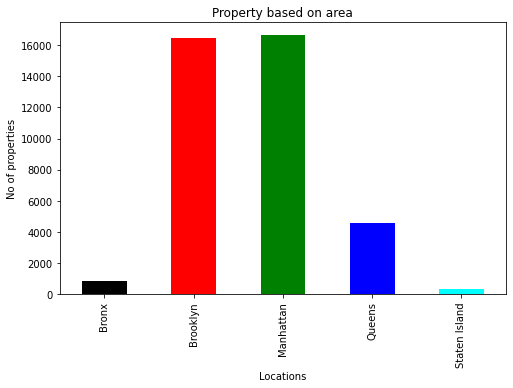

In [46]:
#Bar plot of Property based on area
plt.rcParams['figure.figsize'] = (8, 5)
Host_by_location.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Property based on area')
plt.ylabel('No of properties')
plt.xlabel('Locations')

From the below chart, we can see that the Manhattan and Brooklyn has most of listings,covering more than 85% of the total listings

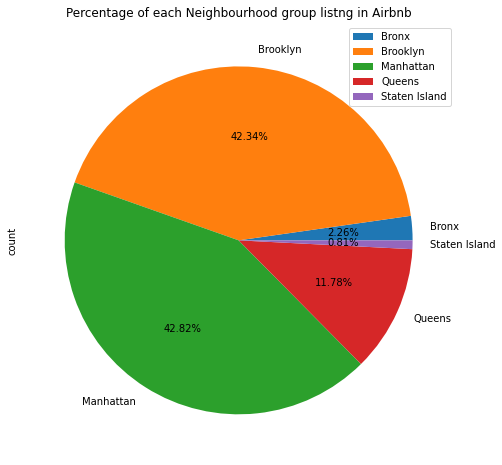

In [47]:
#Pie chart representing count of each neighbourhood group
neighbourhood_group_df = pd.DataFrame(Host_by_location)
neighbourhood_group_df.rename(columns={"id":"count"},inplace=True)
fig = neighbourhood_group_df.plot.pie(y='count',autopct='%.2f%%',title ='Percentage of each Neighbourhood group listng in Airbnb',figsize=(8,8))

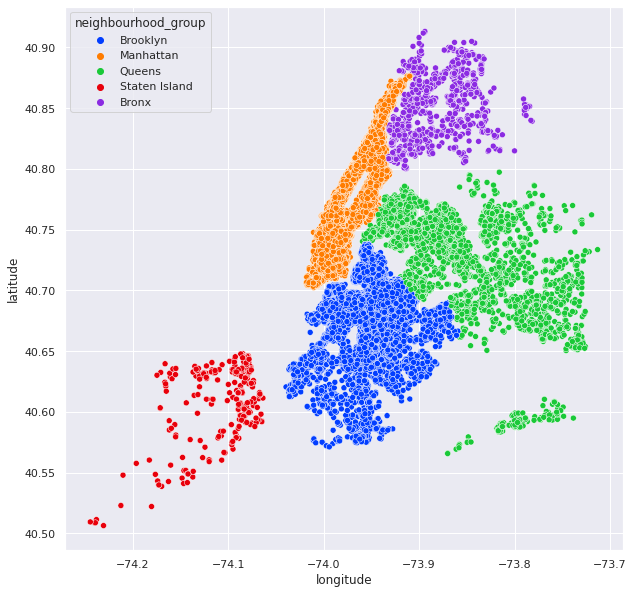

In [48]:
#Sns plot of neighbourhood group
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x='longitude', y='latitude',data=cdf, hue='neighbourhood_group',palette='bright')

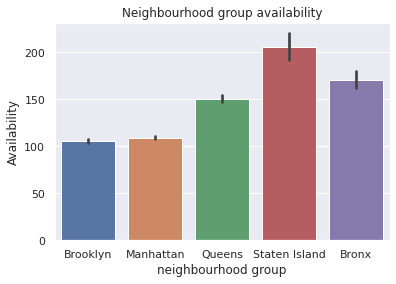

In [49]:
#Bar plot of Neighbourhood group availability 
plt.figure(figsize=(6,4))
sns.barplot(x='neighbourhood_group', y='availability_365', data=cdf)
plt.title('Neighbourhood group availability')
plt.ylabel('Availability')
plt.xlabel('neighbourhood group')
plt.show()